## This is jupyter notebook for titanic survial prediction in Kaggle

- project link is https://www.kaggle.com/competitions/titanic
- project tutorial is https://www.kaggle.com/code/alexisbcook/titanic-tutorial

##### use import function to import necessary packages

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz 
import sklearn as sk
from matplotlib import pyplot as plt
# scikit learn related packages
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

sns.set() # Setting seaborn as default style even if use only matplotlib


print(f"Current pandas version is {pd.__version__}, current sk-learn version is {sk.__version__}")

Current pandas version is 1.2.4, current sk-learn version is 1.1.2


## 1. Data specification

#### Label
- Survived 0=N, 1=Y

#### Features
- PassengerId, passenger ID
- Pclass, ticket class - 1 = 1st, 2 = 2nd, 3 = 3rd
- Name, passenger's name
- Sex, passenger gender, male or female
- Age, passenger's age
- SibSp, # of siblings / spouses aboard the Titanic
- Parch, # of parents / children aboard the Titanic
- Ticket, ticket number
- Fare, passenger fare
- Cabin, cabin number
- Embarked, port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [44]:
# loading trainning file
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# retrieve ID
train_pids = train['PassengerId'].unique()
test_pids = test['PassengerId'].unique()
# print train and test shape
print(f"Train shape {train.shape} with {len(train_pids)} unique ID.")
print(f"Test shape {test.shape} with {len(test_pids)} unique ID.")

Train shape (891, 12) with 891 unique ID.
Test shape (418, 11) with 418 unique ID.


In [45]:
# sample top 5 records in the dataframe
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
# sample top 5 records in the dataframe
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 2. Data prepartion, scan dataset(highlevel)

### 2.1 Use info and describe function to scan the dataframe quickly to get a rough ideal about your datasets
- how many records in the dataframe
- memory consumed by this dataframe
- data type for each column
- any NA values in your datasets
- mean, standard deviation, min, max and percentile


In [47]:
# Use info function to scan the dataframe quickly to get a rough ideal 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
# use describe function to have a rough ideal about statistic about your dataset
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [50]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


### 2.2 Handle NA values
- use median/average to handle **age** NA values
- use sampled data to handle **fare** NA values
- use most frequent to handle **Embarked** NA values

In [51]:
# concat training and testing dataset
train_test = pd.concat([train, test])
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [52]:
# fill median value to age
train_test['Age'].fillna(train_test['Age'].median(), inplace=True)

In [53]:
# check record for fare is null
train_test[train_test['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [54]:
train_test[(train_test['Ticket'].str.startswith('37')) & (train_test['Embarked'] == 'S') & ((train_test['Pclass'] == 3))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
77,78,0.0,3,"Moutal, Mr. Rahamin Haim",male,28.0,0,0,374746,8.0500,NaN,S
95,96,0.0,3,"Shorney, Mr. Charles Joseph",male,28.0,0,0,374910,8.0500,NaN,S
160,161,0.0,3,"Cribb, Mr. John Hatfield",male,44.0,0,1,371362,16.1000,NaN,S
254,255,0.0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S
424,425,0.0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S
431,432,1.0,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,28.0,1,0,376564,16.1000,NaN,S
639,640,0.0,3,"Thorneycroft, Mr. Percival",male,28.0,1,0,376564,16.1000,NaN,S
743,744,0.0,3,"McNamee, Mr. Neal",male,24.0,1,0,376566,16.1000,NaN,S
785,786,0.0,3,"Harmer, Mr. Abraham (David Lishin)",male,25.0,0,0,374887,7.2500,NaN,S


In [55]:
# fill na with median value
median_fare = train_test[(train_test['Ticket'].str.startswith('37')) & (train_test['Embarked'] == 'S') & ((train_test['Pclass'] == 3))]['Fare'].median()
train_test['Fare'].fillna(median_fare, inplace=True)

In [56]:
train_test['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [57]:
train_test['Embarked'].fillna('S', inplace=True) # fill na with most frequent value
train_test['Cabin'].fillna('UNKNOWN', inplace=True) # fill na with unknow

In [58]:
# handle skewed data
train_test['Fare']=train_test['Fare'].map(lambda x: np.log(x) if x>0 else 0)

In [59]:
# double check all the values
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


### 2.3 Data visualization
- visualize relationship between features vs label

#### Visualize features VS label
- Sex VS Survived -> female has a higher survival rate
- Pclass VS Survived -> 1st and 2nd class have a higher survival rate
- SibSp VS Survied -> only 1-2 Siblings or spouse have a higher survival rate
- Parch VS Surivved -> have 1-3 Parents or children have a higher survival rate
- Embarked VS Survived -> embarked on C-Cherbourg have a higher survival rate

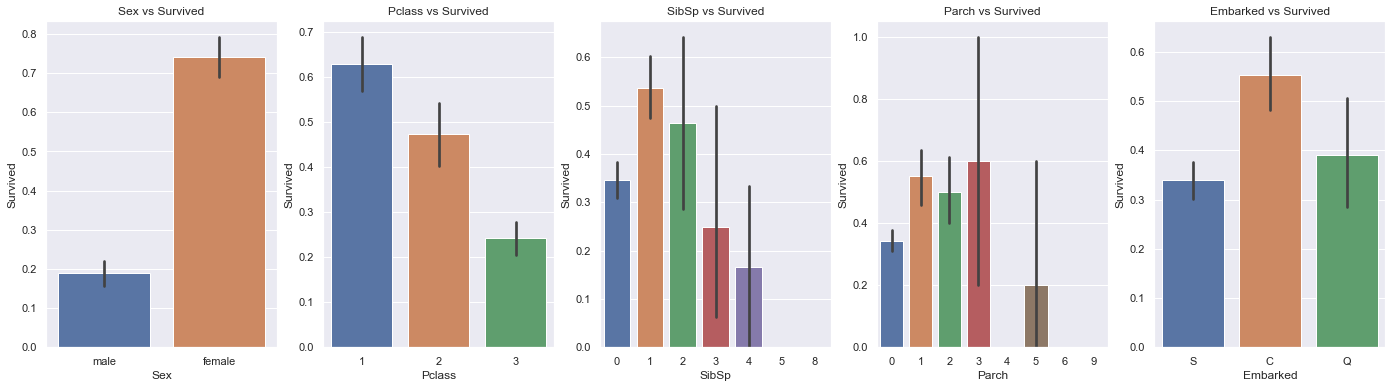

In [60]:
def plot_sex_pclass_sibsp_parch_embarked(df):
    """ function to plot 
    """
    fig, axes = plt.subplots(1, 5, figsize=(24,6))

    sns.barplot(ax=axes[0], x="Sex", y="Survived", data=df)
    axes[0].set_title("Sex vs Survived")

    sns.barplot(ax=axes[1], x="Pclass", y="Survived", data=df)
    axes[1].set_title("Pclass vs Survived")

    sns.barplot(ax=axes[2], x="SibSp", y="Survived", data=df)
    axes[2].set_title("SibSp vs Survived")

    sns.barplot(ax=axes[3], x="Parch", y="Survived", data=df)
    axes[3].set_title("Parch vs Survived")

    sns.barplot(ax=axes[4], x="Embarked", y="Survived", data=df)
    axes[4].set_title("Embarked vs Survived")
    
    
plot_sex_pclass_sibsp_parch_embarked(train_test)

#### Visualize features VS label
- Age VS Survived, children have a higher surivival rate
- Fare VS Survived, expensive fare have a higher surivival rate

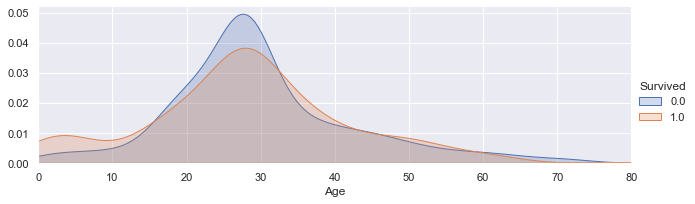

In [61]:
age = sns.FacetGrid(train_test, hue='Survived', aspect=3)
age.map(sns.kdeplot,'Age',shade=True)
age.set(xlim=(0,train_test['Age'].max()))
age.add_legend()

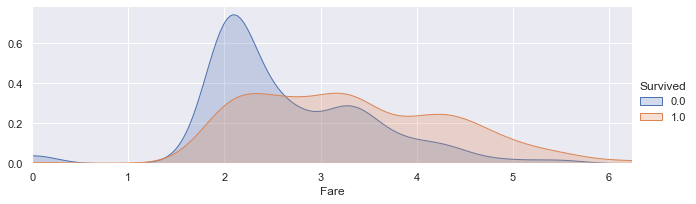

In [62]:
fare = sns.FacetGrid(train_test, hue='Survived', aspect=3)
fare.map(sns.kdeplot,'Fare',shade=True)
fare.set(xlim=(0,train_test['Fare'].max()))
fare.add_legend()

### 2.3 Feature engineering
- creating new feature title from passenger's name
- creating new feature from Cabin, using first character
- creating new feature from Ticket, by counting how many passenger having the same ticket
- creating new feature family size = SibSp + Parch + 1

In [63]:
# adding new feature title
train_test['Title'] = train_test['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
train_test['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
the Countess      1
Dona              1
Mme               1
Sir               1
Don               1
Jonkheer          1
Capt              1
Name: Title, dtype: int64

In [64]:
# align titles
title_mapping = {
    'Mr':'Mr',
    'Miss':'Miss',
    'Mlle':'Miss',
    'Master':'Master',
    'Jonkheer':'Master',
    'Mrs':'Mrs',
    'Mme':'Mrs',
    'Ms':'Mrs',
    'Don':'Mr',
    'Sir':'Mr',
    'the Countess':'Mrs',
    'Dona':'Miss',
    'Lady':'Mrs',
    'Capt':'Officer',
    'Col':'Officer',
    'Major':'Officer',
    'Dr':'Officer',
    'Rev':'Officer'
}
train_test['Title'] = train_test['Title'].map(title_mapping)
train_test['Title'].value_counts()

Mr         759
Miss       263
Mrs        202
Master      62
Officer     23
Name: Title, dtype: int64

In [65]:
# extract first letter as new feature Deck
train_test['Deck']=train_test['Cabin'].map(lambda x:x[0])
train_test['Deck'].value_counts()

U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Deck, dtype: int64

In [66]:
# calc ticket counts
TicketCountMapping = train_test['Ticket'].value_counts()
TicketCountMapping

CA. 2343    11
CA 2144      8
1601         8
PC 17608     7
347082       7
            ..
347074       1
347078       1
36967        1
365226       1
348121       1
Name: Ticket, Length: 929, dtype: int64

In [67]:
# adding new feature ticket count
train_test['TicketCount']=train_test['Ticket'].map(TicketCountMapping)
train_test['TicketCount'].head()

0    1
1    2
2    1
3    2
4    1
Name: TicketCount, dtype: int64

In [68]:
# adding new feature family member
train_test['familySize']=train_test['Parch']+train_test['SibSp']+1

In [69]:
train_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,TicketCount,familySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,UNKNOWN,S,Mr,U,1,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,Mrs,C,2,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,UNKNOWN,S,Miss,U,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,Mrs,C,2,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,UNKNOWN,S,Mr,U,1,1


### 2.3.1 feature engineering - drop noise data(optional)

In [70]:
# create new feature surname
train_test['Surname']=train_test['Name'].map(lambda x:x.split(',')[0].strip())
SurNameDict={}
SurNameDict=train_test['Surname'].value_counts()
train_test['SurnameNum']=train_test['Surname'].map(SurNameDict)

In [73]:
# women under 12 and family size is greater or equal than 2
w_under_12 = train_test.loc[((train_test['Sex'] == 'female')) & \
                            (train_test['Age'] <= 12) & \
                            (train_test['familySize'] >= 2)]

# man above 12 and family size is greater or equal than 2
m_above_12 = train_test.loc[((train_test['Sex'] == 'male')) & \
                            (train_test['Age'] > 12) & \
                            (train_test['familySize'] >= 2)]

In [74]:
w_under_12.loc[w_under_12['Survived'] == 0].sort_values(by=['Name','Age','Ticket'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,TicketCount,familySize,Surname,SurnameNum
297,298,0.0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,5.020916,C22 C26,S,Miss,C,6,4,Allison,4
813,814,0.0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,3.442819,UNKNOWN,S,Miss,U,7,7,Andersson,11
119,120,0.0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,3.442819,UNKNOWN,S,Miss,U,7,7,Andersson,11
541,542,0.0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,3.442819,UNKNOWN,S,Miss,U,7,7,Andersson,11
542,543,0.0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,3.442819,UNKNOWN,S,Miss,U,7,7,Andersson,11
852,853,0.0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,2.724304,UNKNOWN,C,Miss,U,3,3,Boulos,4
147,148,0.0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,3.537330,UNKNOWN,S,Miss,U,5,5,Ford,6
374,375,0.0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,3.048088,UNKNOWN,S,Miss,U,5,5,Palsson,5
24,25,0.0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,3.048088,UNKNOWN,S,Miss,U,5,5,Palsson,5
634,635,0.0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,3.328627,UNKNOWN,S,Miss,U,6,6,Skoog,6


In [76]:
train_test.loc[train_test['Ticket'] == '349909']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,TicketCount,familySize,Surname,SurnameNum
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,3.048088,UNKNOWN,S,Master,U,5,5,Palsson,5
24,25,0.0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,3.048088,UNKNOWN,S,Miss,U,5,5,Palsson,5
374,375,0.0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,3.048088,UNKNOWN,S,Miss,U,5,5,Palsson,5
567,568,0.0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,3.048088,UNKNOWN,S,Mrs,U,5,5,Palsson,5
389,1281,NaN,3,"Palsson, Master. Paul Folke",male,6.0,3,1,349909,3.048088,UNKNOWN,S,Master,U,5,5,Palsson,5


In [78]:
m_above_12.loc[m_above_12['Survived'] == 1].sort_values(by=['Name','Age','Ticket'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,TicketCount,familySize,Surname,SurnameNum
543,544,1.0,2,"Beane, Mr. Edward",male,32.0,1,0,2908,3.258097,UNKNOWN,S,Mr,U,2,2,Beane,2
248,249,1.0,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,3.961845,D35,S,Mr,D,2,3,Beckwith,2
484,485,1.0,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,4.511729,B49,C,Mr,B,2,2,Bishop,2
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,6.238967,B51 B53 B55,C,Mr,B,4,2,Cardeza,2
390,391,1.0,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,4.787492,B96 B98,S,Mr,B,4,4,Carter,6
724,725,1.0,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,113806,3.972177,E8,S,Mr,E,2,2,Chambers,2
690,691,1.0,1,"Dick, Mr. Albert Adrian",male,31.0,1,0,17474,4.043051,B20,S,Mr,B,2,2,Dick,2
599,600,1.0,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,4.041808,A20,C,Mr,A,2,2,Duff Gordon,2
660,661,1.0,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,4.895224,UNKNOWN,S,Officer,U,2,3,Frauenthal,3
587,588,1.0,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,4.371976,B41,C,Mr,B,2,3,Frolicher-Stehli,2


In [81]:
train_test.loc[train_test['Ticket'] == '2653']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,TicketCount,familySize,Surname,SurnameNum
381,382,1.0,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,2.756313,UNKNOWN,C,Miss,U,3,3,Nakid,3
622,623,1.0,3,"Nakid, Mr. Sahid",male,20.0,1,1,2653,2.756313,UNKNOWN,C,Mr,U,3,3,Nakid,3
333,1225,NaN,3,"Nakid, Mrs. Said (Waika Mary"" Mowad)""",female,19.0,1,1,2653,2.756313,UNKNOWN,C,Mrs,U,3,3,Nakid,3


In [82]:
w_under_12['Survived'].groupby(w_under_12['Surname']).mean().value_counts()

1.0    16
0.0     8
Name: Survived, dtype: int64

In [83]:
m_above_12['Survived'].groupby(m_above_12['Surname']).mean().value_counts()

0.0    90
1.0    20
0.5     3
Name: Survived, dtype: int64

In [87]:
# 
w_should_survived = w_under_12.loc[w_under_12['Survived'] == 0]
m_should_not_survived = m_above_12.loc[(m_above_12['Survived'] == 1) & (m_above_12['Pclass'] == 3)]

# ======================== or drop it directly treat it as noise
train_test = train_test.loc[~train_test['PassengerId'].isin(w_should_survived['PassengerId'])]
train_test = train_test.loc[~train_test['PassengerId'].isin(m_should_not_survived['PassengerId'])]

#### 2.4 Data visiualization for new added features
- Title VS Survival
- Deck VS Survival
- TicketCount VS Survial

Text(0.5, 1.0, 'Family Size vs Survived')

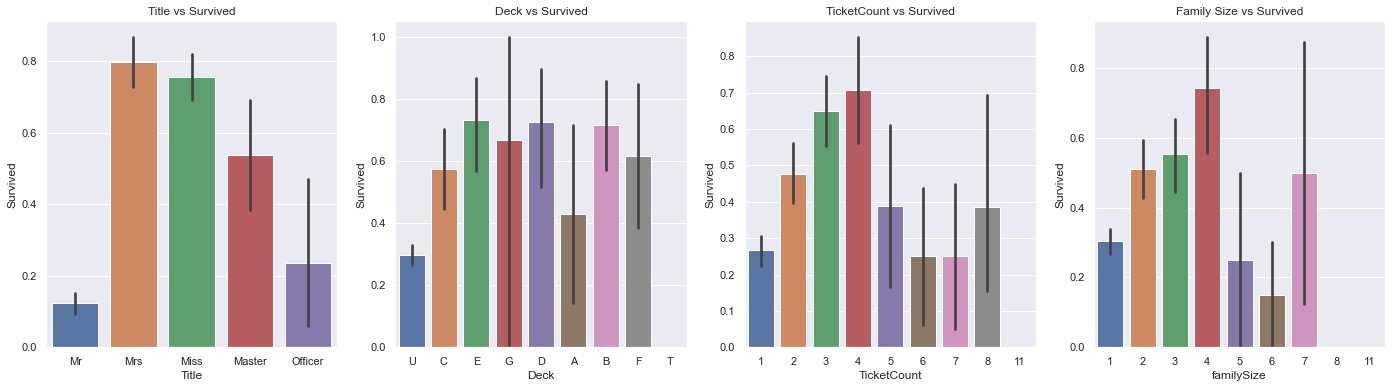

In [33]:
fig, axes = plt.subplots(1, 4, figsize=(24,6))

sns.barplot(ax=axes[0], x="Title", y="Survived", data=train_test)
axes[0].set_title("Title vs Survived")

sns.barplot(ax=axes[1], x="Deck", y="Survived", data=train_test)
axes[1].set_title("Deck vs Survived")

sns.barplot(ax=axes[2], x="TicketCount", y="Survived", data=train_test)
axes[2].set_title("TicketCount vs Survived")

sns.barplot(ax=axes[3], x="familySize", y="Survived", data=train_test)
axes[3].set_title("Family Size vs Survived")

In [34]:
# change family size to categorical feature
train_test['familySizeCate'] = pd.cut(train_test['familySize'], bins=[0,1,4,11], labels=['S','M','L'])
train_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,TicketCount,familySize,Surname,SurnameNum,familySizeCate
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,UNKNOWN,S,Mr,U,1,2,Braund,2,M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,Mrs,C,2,2,Cumings,2,M
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,UNKNOWN,S,Miss,U,1,1,Heikkinen,1,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,Mrs,C,2,2,Futrelle,2,M
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,UNKNOWN,S,Mr,U,1,1,Allen,2,S


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'Survived'),
  Text(1.5, 0, 'Pclass'),
  Text(2.5, 0, 'Age'),
  Text(3.5, 0, 'SibSp'),
  Text(4.5, 0, 'Parch'),
  Text(5.5, 0, 'Fare'),
  Text(6.5, 0, 'TicketCount')])

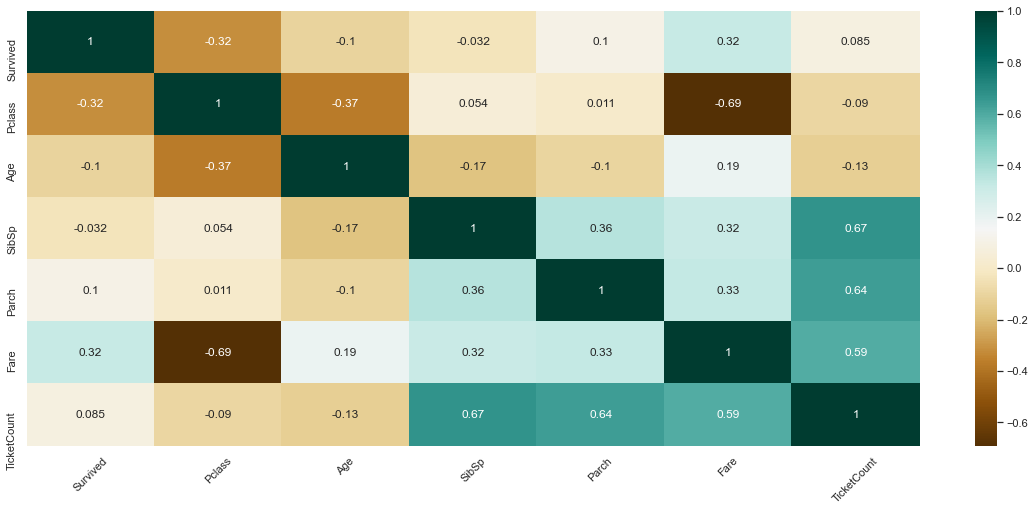

In [35]:
# define feature columns and label columns
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'TicketCount','Sex', 'Embarked', 'Title', 'Deck', 'familySizeCate']
label = ['Survived']

plt.figure(figsize=(20,8))
sns.heatmap(train_test[label + features].corr(), cmap='BrBG', annot=True)
plt.xticks(rotation=45)

In [36]:
# generate one-hot encoding for categorical features
categorical_features = ['Sex', 'Embarked', 'Title', 'Deck']
onehot_encoding = pd.get_dummies(train_test[categorical_features])
# concat back to previous dataframe
train_test = pd.concat([train_test, onehot_encoding], axis=1)
# drop previous column
train_test = train_test.drop(columns=['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Title', 'Deck','Surname','familySize','familySizeCate'])

train_test.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,TicketCount,SurnameNum,Sex_female,...,Title_Officer,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,1,0.0,3,22.0,1,0,1.981001,1,2,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,1,38.0,1,0,4.266662,2,2,1,...,0,0,0,1,0,0,0,0,0,0
2,3,1.0,3,26.0,0,0,2.070022,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,4,1.0,1,35.0,1,0,3.972177,2,2,1,...,0,0,0,1,0,0,0,0,0,0
4,5,0.0,3,35.0,0,0,2.085672,1,2,0,...,0,0,0,0,0,0,0,0,0,1


In [646]:
train_test.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'TicketCount', 'SurnameNum', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Officer', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_U'],
      dtype='object')

## 3. Modeling

### 3.1 Try scikit-learn models

In [647]:
features = [c for c in train_test.columns if c not in ['PassengerId', 'Survived']]

# retrieve traning set only
processed_train = train_test[~train_test['Survived'].isna()]

# generate training and testing features
x = processed_train[features]
y = processed_train[label]

# define K fold and set K = 10
kfold = StratifiedKFold(n_splits=10)

# define classifiers
classifiers=[]
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(ExtraTreesClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression())
classifiers.append(LinearDiscriminantAnalysis())
# define name for each algo
algorithms = ['SVC','DecisionTreeCla','RandomForestCla','ExtraTreesCla', 'GradientBoostingCla','KNN','LR','LinearDiscrimiAna']

# define cross validation results
cross_val_results=[]
cv_means=[]
cv_std=[]
# train classifiers
for c in classifiers:
    model_result = cross_val_score(c, x, y, scoring='accuracy', cv=kfold, n_jobs=-1)
    cross_val_results.append(model_result)
    cv_means.append(model_result.mean())
    cv_std.append(model_result.std())

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


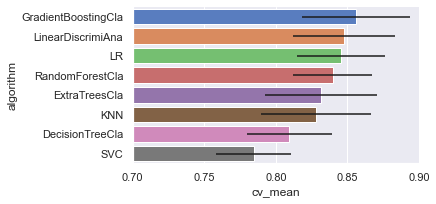

In [648]:
# save result into dataframe
result_df = pd.DataFrame({'cv_mean':cv_means, 'cv_std':cv_std, 'algorithm':algorithms})
# po
cvResFacet=sns.FacetGrid(result_df.sort_values(by='cv_mean',ascending=False),sharex=False, sharey=False,aspect=2)
cvResFacet.map(sns.barplot,'cv_mean','algorithm',**{'xerr':cv_std}, palette='muted')
cvResFacet.set(xlim=(0.7,0.9))
cvResFacet.add_legend()

### 3.2 Try GBC with grid search

In [649]:
# select best model to fine tune hyper-parameter
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
                 'n_estimators' : [100,200,300],
                 'learning_rate': [0.1, 0.05, 0.01],
                 'max_depth': [4, 8],
                 'min_samples_leaf': [100,150],
                 'max_features': [0.3, 0.1]
                }
modelgsGBC = GridSearchCV(GBC, 
                          param_grid=gb_param_grid, 
                          cv=kfold, 
                          scoring="accuracy", 
                          n_jobs= -1, 
                          verbose = 1)
modelgsGBC.fit(x,y)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'loss': ['deviance'], 'max_depth': [4, 8],
                         'max_features': [0.3, 0.1],
                         'min_samples_leaf': [100, 150],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [650]:
print(f"Best model score for GBC is {modelgsGBC.best_score_}")

Best model score for GBC is 0.8560191518467853


In [651]:
# retrieve testing set
processed_test = train_test[train_test['Survived'].isna()]
processed_test_x = x = processed_test[features]


# predict on test dataset
predictions = modelgsGBC.predict(processed_test_x)

# append prediction back to previous dataframe
processed_test['Survived'] = predictions

# generate submission file
submission_file = processed_test[['PassengerId','Survived']]
submission_file = submission_file.astype({'Survived':int})

# export 
submission_file.to_csv('submission.csv', index=False)

<ipython-input-651-e7effc47c585>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_test['Survived'] = predictions


In [652]:
# retrieve testing set
submission_file

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### 3.4 Try LightGBM

In [653]:
import lightgbm as lgb


# define hyper parameters
params = {
    'boosting_type': 'gbdt',
    'learning_rate': 0.01,
    'lambda_l1': 0.1,
    'lambda_l2': 0.2,
    'max_depth': 4,
    'objective': 'binary',
    'n_jobs': 8,
    'metric': 'binary_logloss',
    'verbose': 0
}

x = processed_train[features]
y = processed_train[label]

# split training data into train and validation
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

# convert data to lgb dataset
train_data = lgb.Dataset(X_train, label=y_train)
validation_data = lgb.Dataset(X_test, label=y_test)


# train
gbm = lgb.train(params, train_data, valid_sets=[validation_data])

# retrieve test_x
processed_test_x = x = processed_test[features]

# predict
y_pred = gbm.predict(processed_test_x)

print(y_pred)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_logloss: 0.685903
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_logloss: 0.679818
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_logloss: 0.674021
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_logloss: 0.668191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_logloss: 0.662638
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0's binary_logloss: 0.657074
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7]	valid_0'

### 3.5 Try lightGBM with scikit-learn and grid search

In [656]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

x = processed_train[features]
y = processed_train[label]

# try grid search
estimator = LGBMClassifier(num_leaves=31)
param_grid = {
    'learning_rate': [0.01, 0.05, 0.02, 0.1],
    'n_estimators': [10, 20, 40,50,60,80,100],
    'max_depth': [3,4,5,6,7]
}
gbm = GridSearchCV(estimator, param_grid)
gbm.fit(x, y)
print('Best parameters found by grid search are:', gbm.best_params_)

# retrieve test_x
processed_test_x = x = processed_test[features]

y_pred = gbm.predict(processed_test_x)

print(y_pred)

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/qucy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was

Best parameters found by grid search are: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 80}
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0

### 3.6 Generate submission file

In [657]:
# generate submission file for lightGBM
Survives = [1 if x >=0.65 else 0 for x in y_pred]

submission_file['Survived'] = Survives

submission_file.to_csv('submission.csv', index=False)

### Some ground truth for test dataset
- 1084 -> 0
- 1284 -> 0
- 1142 -> 1
- 1109 -> 0
- 899 -> 1